## Perceptron

Perceptron is a supervised machine learning algorithm and can be regarded as the base of neural network architectures. A perceptron is basically a neuron in NN models. It is also a binary linear classifier. <br>
Similar to logistic regression, it has a real-valued weight vector w and a real-valued bias b.
Unlike logistic regression which uses a sigmoid function as its activation function, perceptron has a step function(heaviside) as activation function. <br>
### Training Steps
1. Initialize weight vector and bias with zero (or very minimal) values
2. Calculate $$\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b $$
3. Apply the step function <br>
$$\hat{y}^{(i)} = 1 \, if \, a^{(i)} \geq 0, \, else \, 0$$
4. Compute the weight updates using perceptron learning rule <br>
$$
\Delta \boldsymbol{w} = \eta \, \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)
$$$$ \Delta b = \eta \, \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big) $$
5. Update the weights and bias <br>
$$w = w + \Delta \boldsymbol{w}$$ <br>
$$b = b + \Delta \boldsymbol{b}$$

### Data

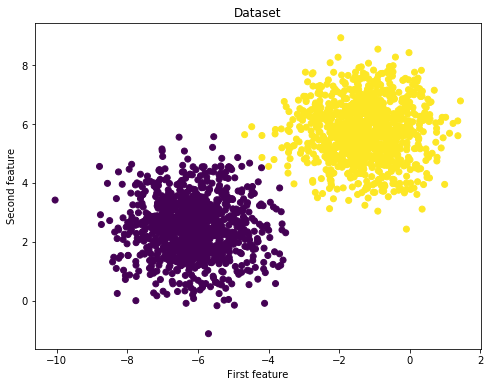

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
    
np.random.seed(1234)

X, y = make_blobs(n_samples=2000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.show()

In [14]:
# Reshaping y variable such that it is (n_samples, 1)
# or in other words, making it a column vector
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (1500, 2)
Shape y_train: (1500, 1)
Shape X_test: (500, 2)
Shape y_test: (500, 1)


### Model

In [15]:
class Perceptron:
    def __init__(self):
        pass
    
    def step_function(self, x):
        return np.array([1 if i >= 0 else 0 for i in x])[:, np.newaxis]
    
    def train(self, X, y, alpha=0.001, iterations=100):
#         Step 1: Initialize the parameters
        n_samples, n_features = X.shape
        self.w = np.zeros(shape=(n_features,1))
        self.b = 0
        
        for i in range(iterations):
#             Step 2 and 3: Computing linear combination of input features
#             and then passing through step function
            y_hat = self.step_function(np.dot(X, self.w) + self.b)
#             Step 4: Compute weight updates
            delta_w = alpha * np.dot(X.T, (y - y_hat))
            delta_b = alpha * np.sum(y - y_hat)
#             Step 5: Update the parameters
            self.w += delta_w
            self.b += delta_b
            
        return self.w, self.b
    
    def predict(self, X):
        return self.step_function(np.dot(X, self.w) + self.b)

### Initializing and training the model

In [16]:
perceptron = Perceptron()
w_trained, b_trained = perceptron.train(X_train, y_train, alpha=0.003, iterations=600)

### Testing the model

In [17]:
y_pred_train = perceptron.predict(X_train)
y_pred_test = perceptron.predict(X_test)
print(f"train accuracy: {100 - np.mean(np.abs(y_pred_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_pred_test - y_test))*100}%")

train accuracy: 100.0%
test accuracy: 100.0%


### Visualize decision boundary

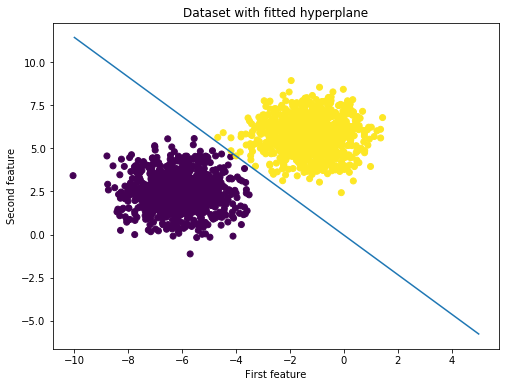

In [19]:
def plot_hyperplane(X, y, w, b):
    slope = -w[0]/w[1]
    intercept = -b/w[1]
    x_hyperplane = np.linspace(-10,5,5)
    y_hyperplane = slope*x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y.ravel())
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset with fitted hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()
    
plot_hyperplane(X, y, w_trained, b_trained)